# Data Science And Business Analytics Internship

# The Sparks Foundation: #GRIPJULY21

# Author: Vivek Kirpan

Task 2: Prediction using Unsupervised ML

Problem Statement: From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

# Importing Libraries

In [9]:
# import all the libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from google.colab import files
import io
%matplotlib inline

# Reading Dataset

In [10]:
uploaded = files.upload()

iris_df = pd.read_csv(io.BytesIO(uploaded["Iris.csv"]))
print("Data imported successfully")

# To find number of rows and columns
print("Shape of Data:", iris_df.shape)

Saving Iris.csv to Iris (3).csv
Data imported successfully
Shape of Data: (150, 6)


In [11]:
# Showing top 5 records from the dataset

iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
# To find more information about our dataset
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [13]:
# Check if dataset contains any null values
iris_df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There are no null values in the dataset

# Finding optimum number of clusters

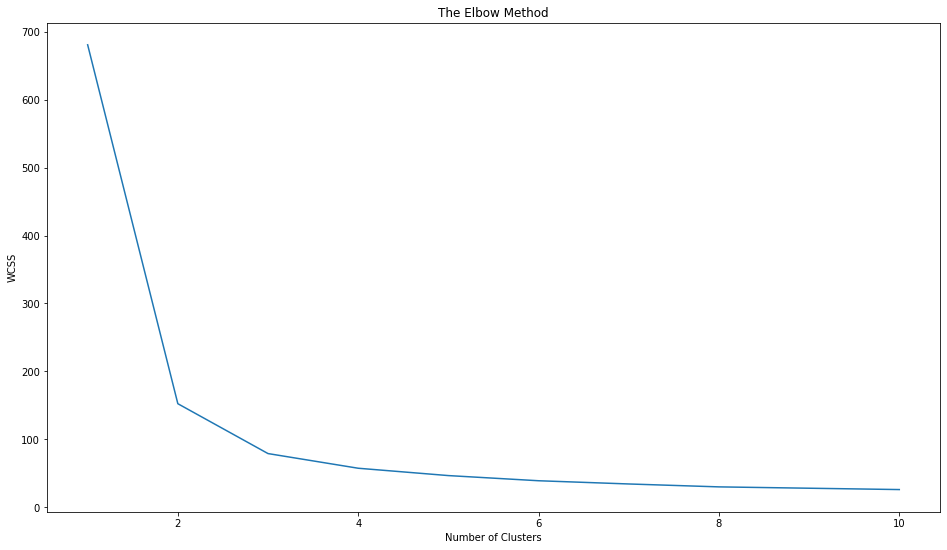

In [18]:
# Finding optimum number of clusters for k-means using The Elbow Method
x = iris_df.iloc[:, [1, 2, 3, 4]].values

wcss = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

# Plotting the results on line graph to observe The Elbow
plt.figure(figsize=(16,9))
plt.plot(range(1, 11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

As we can see from the graph, the optimum number of clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we can choose the number of clusters as '3'.

# Creating Kmeans Classifier

In [19]:
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=0)
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [25]:
# Finding centroids for each cluster
centroids = kmeans.cluster_centers_
print("Centroids: ", centroids)
cluster_labels = np.unique(y_kmeans)
print("Clusters: ", cluster_labels)

# Unique Species available
species = iris_df['Species'].unique()
print("Unique Species: ", species)

Centroids:  [[6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.418      1.464      0.244     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]]
Clusters:  [0 1 2]
Unique Species:  ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


# Data Visualization

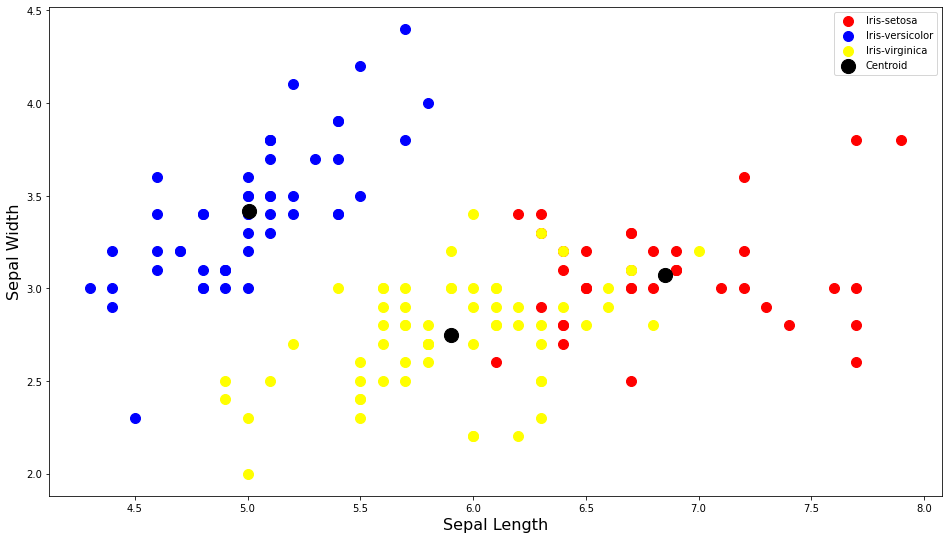

In [28]:
# Visualizing the data for Sepal Length vs Sepal Width
plt.figure(figsize=(16,9))
colors = ['red', 'blue', 'yellow']

for i in cluster_labels:
  plt.scatter(x[y_kmeans == i, 0], x[y_kmeans == i, 1], s=100, c=colors[i], label=species[i])

# Plotting centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='black', label='Centroid')
plt.legend()
plt.xlabel("Sepal Length", fontsize=16)
plt.ylabel("Sepal Width", fontsize=16)
plt.show()

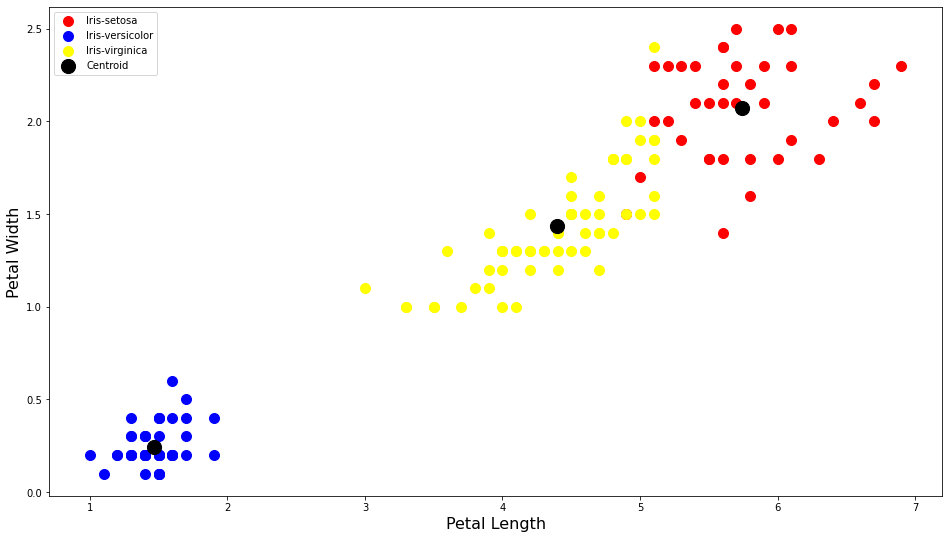

In [29]:
# Visualizing the data for Petal Length vs Petal Width
plt.figure(figsize=(16,9))
colors = ['red', 'blue', 'yellow']

for i in cluster_labels:
  plt.scatter(x[y_kmeans == i, 2], x[y_kmeans == i, 3], s=100, c=colors[i], label=species[i])

# Plotting centroids
plt.scatter(centroids[:, 2], centroids[:, 3], s=200, c='black', label='Centroid')
plt.legend()
plt.xlabel("Petal Length", fontsize=16)
plt.ylabel("Petal Width", fontsize=16)
plt.show()

Conclusion:
The Dataset is divided into optimum number of clusters i.e. 3 and they are represented visually along with their centroids.